The aim of this project is to provide a practical overview of the general DS/ML workflow, which is becoming an increasingly popular framework upon which modern-day actuarial pricing methods are being built. Accurate prediction of loan approvals is currently one of the most crucial challenges that businesses across the industry are facing, where providing accurate estimates of loan approvals is vital to ensuring a person has a good background history of loan and investments, especially as the sector is currently experiencing a swelling volume of claims - for example, regarding business interruption - as one of the major consequences of COVID-19.

As a case study, we will introduce some supervised ML techniques.

In [1]:
# Import key modules that will be used throughout the project.

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # graphs/plotting
import seaborn as sns

In [2]:
df = pd.read_csv('Financial_Data.csv')

In [3]:
df.head(5)

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


## EDA

In [4]:
df.columns

Index(['entry_id', 'age', 'pay_schedule', 'home_owner', 'income',
       'months_employed', 'years_employed', 'current_address_year',
       'personal_account_m', 'personal_account_y', 'has_debt',
       'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
       'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month', 'e_signed'],
      dtype='object')

In [5]:
df.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622974,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


In [7]:
#data cleaning:

df.isnull().any()

entry_id                False
age                     False
pay_schedule            False
home_owner              False
income                  False
months_employed         False
years_employed          False
current_address_year    False
personal_account_m      False
personal_account_y      False
has_debt                False
amount_requested        False
risk_score              False
risk_score_2            False
risk_score_3            False
risk_score_4            False
risk_score_5            False
ext_quality_score       False
ext_quality_score_2     False
inquiries_last_month    False
e_signed                False
dtype: bool

In [9]:
df1 = df.drop(['entry_id','pay_schedule', 'e_signed'], axis=1)

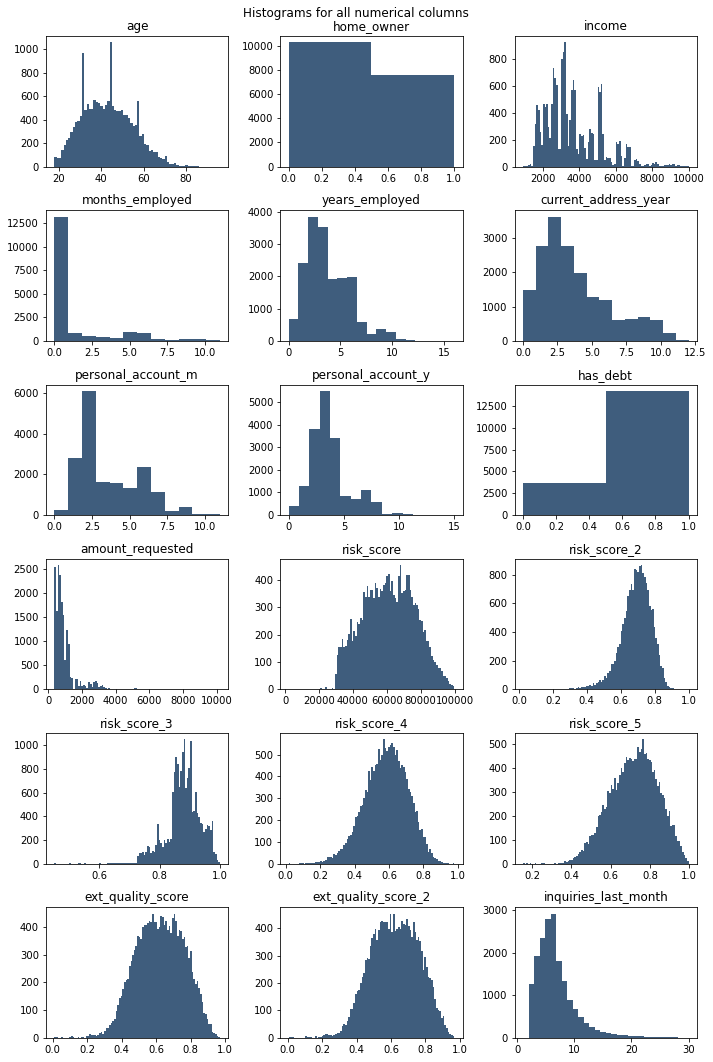

In [14]:
fig = plt.figure(figsize=(10,15))
plt.suptitle('Histograms for all numerical columns')
for i in range (df1.shape[1]):
    plt.subplot(6,3, i+1)
    f = plt.gca()
    f.set_title(df1.columns.values[i])
    
    vals = np.size(df1.iloc[:, i].unique())
    if vals > 100:
        vals=100
    plt.hist(df1.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout()


most of the above columns are following normal distributions

<AxesSubplot:>

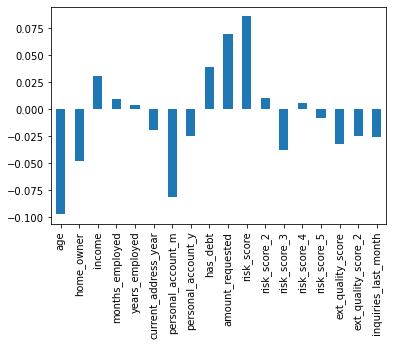

In [16]:
df1.corrwith(df.e_signed).plot.bar()

## Feature Engineering

In [17]:
dataset = df.drop('months_employed', axis=1)

In [19]:
#add years into months and drop other two cols:
dataset['personal_account_moths'] = dataset.personal_account_m + (dataset.personal_account_y*12)
dataset = df.drop(['personal_account_m','personal_account_y'], axis=1)

## Data Preprocessing

In [25]:
dataset = pd.get_dummies(dataset)
#remove below col to have multi-linearity
dataset = dataset.drop('pay_schedule_semi-monthly', axis=1)

In [43]:
#splitting inro train and test:

X = dataset.drop(columns=['entry_id', 'e_signed'])
y = dataset['e_signed']

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [47]:
#converting back to dataframe after scaling
pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns.values)
pd.DataFrame(sc.transform(X_test), columns=X_test.columns.values)

,age,home_owner,income,months_employed,years_employed,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,pay_schedule_bi-weekly,pay_schedule_monthly,pay_schedule_weekly
0,-1.013789,-0.856349,-0.242358,-0.494169,-1.124197,-1.302383,0.507058,0.358706,-0.944012,0.548408,-1.076350,0.059153,0.326152,0.314517,-0.399633,0.696555,-1.224638,-0.30236,-0.505861
1,-1.013789,-0.856349,-0.335577,-0.494169,-0.237027,-1.302383,-1.972161,-0.213457,0.767226,-0.024644,-0.047016,-0.029979,0.641494,-0.781613,-0.063715,-1.207338,0.816568,-0.30236,-0.505861
2,0.245958,-0.856349,-0.598586,-0.494169,2.868070,0.884094,0.507058,0.215665,0.757484,-1.051686,-0.521003,-1.033452,-1.293930,-0.505566,-0.503429,-0.391384,-1.224638,-0.30236,-0.505861
3,0.329941,-0.856349,0.237051,-0.494169,-0.237027,2.341745,0.507058,2.718881,1.264037,-0.268713,-0.313492,-0.381701,1.167423,-0.616575,0.816657,-0.119399,-1.224638,-0.30236,1.976827
4,-0.509890,1.167748,3.357207,-0.076797,-0.237027,-0.937970,0.507058,2.790402,1.189353,-0.224014,1.102305,0.237540,0.350924,1.006524,1.007200,-0.663369,-1.224638,-0.30236,-0.505861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3577,0.581891,1.167748,0.070589,-0.494169,-1.124197,-0.209144,0.507058,0.215665,0.523691,0.733104,1.739835,-0.757632,-0.753591,-0.196725,0.520607,-0.935353,-1.224638,-0.30236,-0.505861
3578,-1.433705,1.167748,1.171233,0.340575,2.868070,-0.937970,0.507058,0.287186,-0.119241,-0.062849,0.466213,-0.010543,-0.661026,-1.230819,-1.227981,-0.119399,-1.224638,-0.30236,-0.505861
3579,-0.089974,-0.856349,-0.412149,-0.494169,1.093729,1.248507,0.507058,-0.355068,-0.372517,1.302741,-0.009006,-1.744279,-1.199745,0.091690,-0.622244,-0.935353,0.816568,-0.30236,-0.505861
3580,-0.257941,-0.856349,-0.255675,-0.494169,0.650144,0.884094,0.507058,0.358706,0.377570,-0.449027,0.199737,-0.362011,-0.726789,-1.491009,-0.772426,-0.663369,0.816568,-0.30236,-0.505861


## Model Building-1

In [48]:
from sklearn.linear_model import LogisticRegression

In [73]:
classifier = LogisticRegression(random_state=0, penalty='l1',  solver='liblinear')
classifier.fit(X_train, y_train)

#predictions:
y_pred = classifier.predict(X_test)

In [74]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

## Model Evaluation

In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [76]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [77]:
results = pd.DataFrame([['Logistic regression (Lasso)', acc, prec, rec, f1]], columns=['model', 'accuracy', 'precision', 'recall', 'f1_score'])

In [78]:
results

,model,accuracy,precision,recall,f1_score
0,Logistic regression (Lasso),0.566443,0.579416,0.709544,0.637911


## Model Building-2

In [79]:
from sklearn.svm import SVC

classifier = SVC(random_state=0, kernel='linear')
classifier.fit(X_train, y_train)

#predictions:
y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results1 = pd.DataFrame([['SVM', acc, prec, rec, f1]], columns=['model', 'accuracy', 'precision', 'recall', 'f1_score'])


In [85]:
results = pd.concat([results, results1], ignore_index=True)

In [86]:
results

,model,accuracy,precision,recall,f1_score
0,Logistic regression (Lasso),0.566443,0.579416,0.709544,0.637911
1,SVM,0.556393,0.564621,0.768154,0.650846


In [65]:
### SVM(rbf)

In [87]:
from sklearn.svm import SVC

classifier = SVC(random_state=0, kernel='rbf')
classifier.fit(X_train, y_train)

#predictions:
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results2 = pd.DataFrame([['SVC(rbf)', acc, prec, rec, f1]], columns=['model', 'accuracy', 'precision', 'recall', 'f1_score'])
results=pd.concat([results, results2], ignore_index=True)

In [88]:
## Model Building-3

In [89]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(random_state=0, n_estimators=100)
classifier.fit(X_train, y_train)

#predictions:
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results3 = pd.DataFrame([[' RandomForest', acc, prec, rec, f1]], columns=['model', 'accuracy', 'precision', 'recall', 'f1_score'])
results = pd.concat([results, results3], ignore_index=True)

In [90]:
results

,model,accuracy,precision,recall,f1_score
0,Logistic regression (Lasso),0.566443,0.579416,0.709544,0.637911
1,SVM,0.556393,0.564621,0.768154,0.650846
2,SVC(rbf),0.547460,0.548377,0.902490,0.682219
3,RandomForest,0.602457,0.620114,0.674793,0.646299


In [92]:
# cross validation
from sklearn.model_selection import cross_validate,cross_val_score
accuracies = cross_validate(estimator=classifier, X=X_train, y=y_train, cv=100)

In [105]:
accuracies['test_score'].mean()*100

62.396658896658906

In [ ]:
#using cross validation gives us more accuracy for Random Forest

In [95]:
from sklearn.model_selection import GridSearchCV

In [108]:
# Grid Search

parameters = {'max_depth':[3,None], 
              'max_features':[1,5,10], 
              'min_samples_split':[2,5,10], 
              'min_samples_leaf':[1,5,10],
             'criterion':['entropy', 'gini']}

grid_search = GridSearchCV(estimator=classifier,
                         param_grid = parameters,
                         scoring='accuracy',
                         cv=10,
                         n_jobs=-1)

In [109]:
grid_search = grid_search.fit(X_train, y_train)

In [110]:
rf_best_accuracy = grid_search.best_score_
rf_best_params = grid_search.best_params_

In [111]:
rf_best_accuracy,rf_best_params

(0.629207000198825,
 {'criterion': 'entropy',
  'max_depth': None,
  'max_features': 10,
  'min_samples_leaf': 1,
  'min_samples_split': 10})

In [116]:
#predictions:
y_pred = grid_search.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results4 = pd.DataFrame([['Random Forest with grid search', acc, prec, rec, f1]], columns=['model', 'accuracy', 'precision', 'recall', 'f1_score'])
results=pd.concat([results, results4], ignore_index=True)

In [117]:
results

,model,accuracy,precision,recall,f1_score
0,Logistic regression (Lasso),0.566443,0.579416,0.709544,0.637911
1,SVM,0.556393,0.564621,0.768154,0.650846
2,SVC(rbf),0.547460,0.548377,0.902490,0.682219
3,RandomForest,0.602457,0.620114,0.674793,0.646299
4,Random Forest with grid search,0.629257,0.639405,0.713693,0.674510


we can see that the performance of Random Forest model is better with grid search approach as compared to other models

In [121]:
final_results = pd.concat([df['entry_id'],y_test], axis=1).dropna()

In [123]:
final_results['prediction'] = y_pred

In [124]:
final_results

,entry_id,e_signed,prediction
8,6493191,1.0,0
9,8908605,1.0,0
12,6889184,1.0,1
16,9375601,0.0,1
18,8515555,1.0,1
...,...,...,...
17881,5028251,1.0,1
17888,8958068,0.0,1
17890,3605941,0.0,1
17901,1807355,0.0,1
